# DSDBAL MINI PROJECT 

## Performing Data Analysis on Vaccine Data 


### *GROUP MEMBERS:* 
### 31448 Yashraj Lad
### 31455 Misbah Bagwan
### 31456 Prathamesh Naik


## Importing important libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Vaccination_Rates_by_Neighborhood.csv')

In [3]:

df.head()

,CITY_TYPE,CITY,COMMUNITY,LABEL,City_Community,Cases,Case_Rate,Deaths,Death_Rate,Percent_of_People_with_1__Dose,Percent_of_People_Fully_Vaccinated
0,City,Agoura Hills,,City of Agoura Hills,City of Agoura Hills,4220,20208.0,22,105.0,0.85,0.80
1,City,Alhambra,,City of Alhambra,City of Alhambra,17044,19653.0,255,294.0,0.87,0.81
2,City,Arcadia,,City of Arcadia,City of Arcadia,8145,14103.0,165,286.0,0.91,0.84
3,City,Artesia,,City of Artesia,City of Artesia,4186,24924.0,88,524.0,0.87,0.80
4,City,Avalon,,City of Avalon,City of Avalon,63,1628.0,0,0.0,0.27,0.23


In [4]:
df.shape

(341, 11)

In [5]:
df.describe()

,Cases,Case_Rate,Deaths,Death_Rate,Percent_of_People_with_1__Dose,Percent_of_People_Fully_Vaccinated
count,341.000000,339.000000,341.000000,339.000000,340.000000,340.000000
mean,8180.964809,29345.171091,93.272727,380.920354,0.699529,0.683088
std,11987.991290,39349.567669,137.122033,1382.866199,0.254973,0.186643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,753.000000,19171.000000,6.000000,144.000000,0.720000,0.660000
50%,3998.000000,24942.000000,38.000000,264.000000,0.785000,0.720000
75%,10573.000000,31555.000000,132.000000,374.000000,0.840000,0.780000
max,125823.000000,541667.000000,1264.000000,24074.000000,0.950000,0.950000


In [6]:
df.isnull().sum()

CITY_TYPE                             0
CITY                                  0
COMMUNITY                             0
LABEL                                 0
City_Community                        0
Cases                                 0
Case_Rate                             2
Deaths                                0
Death_Rate                            2
Percent_of_People_with_1__Dose        1
Percent_of_People_Fully_Vaccinated    1
dtype: int64

In [7]:
null_features = ['Case_Rate', 'Death_Rate', 'Percent_of_People_with_1__Dose', 'Percent_of_People_Fully_Vaccinated']

for col in null_features:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


In [8]:
df.isnull().sum()

CITY_TYPE                             0
CITY                                  0
COMMUNITY                             0
LABEL                                 0
City_Community                        0
Cases                                 0
Case_Rate                             0
Deaths                                0
Death_Rate                            0
Percent_of_People_with_1__Dose        0
Percent_of_People_Fully_Vaccinated    0
dtype: int64

In [9]:
inconsistent_vaccination = df[
    (df['Percent_of_People_with_1__Dose'] > 1.0) |
    (df['Percent_of_People_Fully_Vaccinated'] > 1.0)
]


In [10]:
inconsistent_vaccination

,CITY_TYPE,CITY,COMMUNITY,LABEL,City_Community,Cases,Case_Rate,Deaths,Death_Rate,Percent_of_People_with_1__Dose,Percent_of_People_Fully_Vaccinated


In [11]:
inconsistent_vaccination_count = len(inconsistent_vaccination)
inconsistent_vaccination_count

0

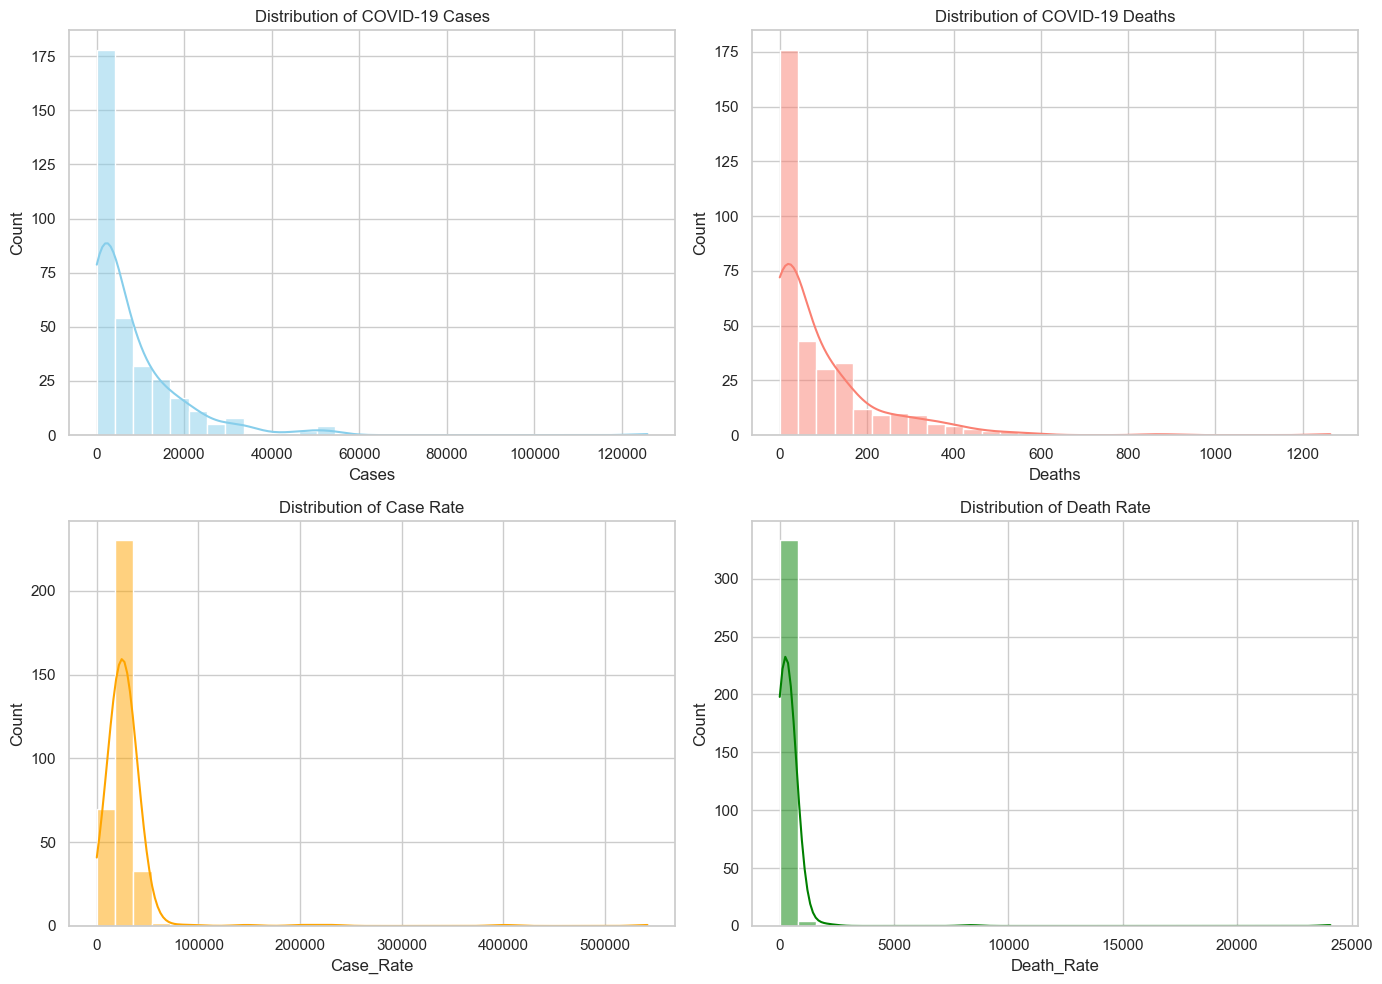

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_theme(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Cases
sns.histplot(df['Cases'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of COVID-19 Cases')

# 2. Distribution of Deaths
sns.histplot(df['Deaths'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of COVID-19 Deaths')

# 3. Distribution of Case Rate
sns.histplot(df['Case_Rate'], bins=30, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of Case Rate')

# 4. Distribution of Death Rate
sns.histplot(df['Death_Rate'], bins=30, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribution of Death Rate')

# Adjust layout
plt.tight_layout()
plt.show()


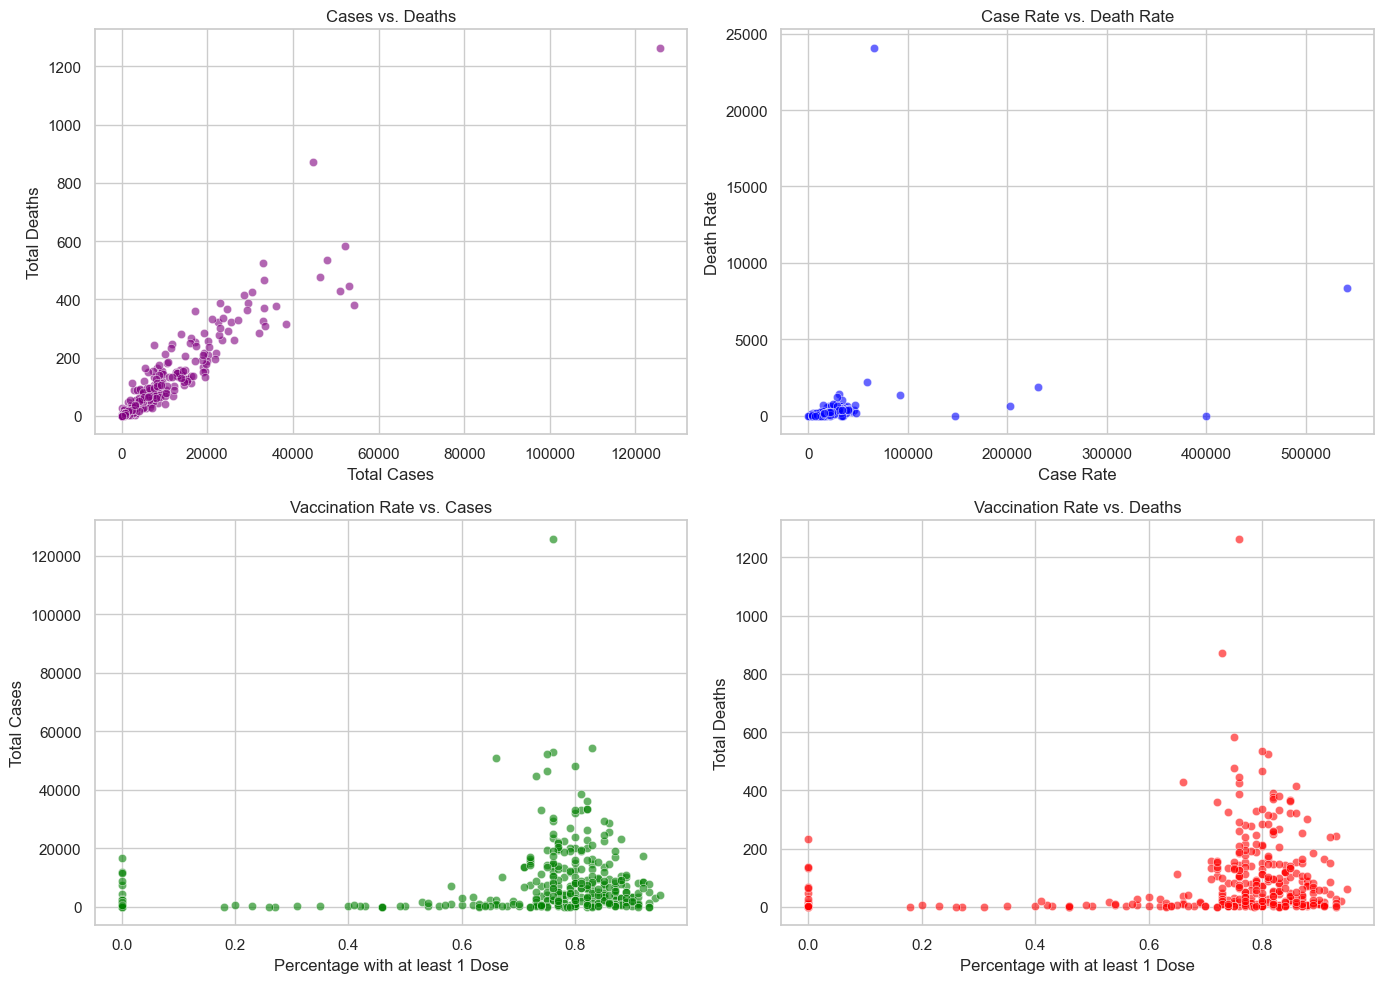

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_theme(style="whitegrid")

# Create a figure with subplots for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Cases vs. Deaths (Scatter Plot)
sns.scatterplot(x=df['Cases'], y=df['Deaths'], ax=axes[0, 0], color='purple', alpha=0.6)
axes[0, 0].set_title('Cases vs. Deaths')
axes[0, 0].set_xlabel('Total Cases')
axes[0, 0].set_ylabel('Total Deaths')

# 2. Case Rate vs. Death Rate (Scatter Plot)
sns.scatterplot(x=df['Case_Rate'], y=df['Death_Rate'], ax=axes[0, 1], color='blue', alpha=0.6)
axes[0, 1].set_title('Case Rate vs. Death Rate')
axes[0, 1].set_xlabel('Case Rate')
axes[0, 1].set_ylabel('Death Rate')

# 3. Vaccination Rate vs. Cases (Scatter Plot)
sns.scatterplot(x=df['Percent_of_People_with_1__Dose'], y=df['Cases'], ax=axes[1, 0], color='green', alpha=0.6)
axes[1, 0].set_title('Vaccination Rate vs. Cases')
axes[1, 0].set_xlabel('Percentage with at least 1 Dose')
axes[1, 0].set_ylabel('Total Cases')

# 4. Vaccination Rate vs. Deaths (Scatter Plot)
sns.scatterplot(x=df['Percent_of_People_with_1__Dose'], y=df['Deaths'], ax=axes[1, 1], color='red', alpha=0.6)
axes[1, 1].set_title('Vaccination Rate vs. Deaths')
axes[1, 1].set_xlabel('Percentage with at least 1 Dose')
axes[1, 1].set_ylabel('Total Deaths')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


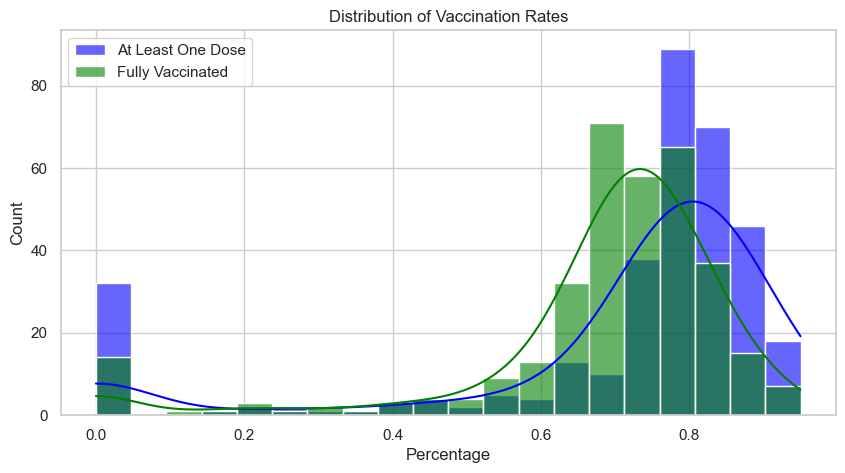

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Percent_of_People_with_1__Dose'], bins=20, kde=True, color='blue', alpha=0.6, label="At Least One Dose")
sns.histplot(df['Percent_of_People_Fully_Vaccinated'], bins=20, kde=True, color='green', alpha=0.6, label="Fully Vaccinated")
plt.title("Distribution of Vaccination Rates")
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.legend()
plt.show()


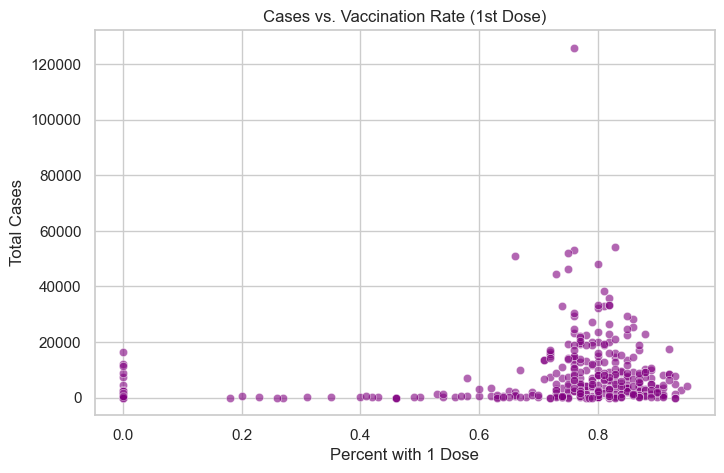

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Percent_of_People_with_1__Dose'], y=df['Cases'], color='purple', alpha=0.6)
plt.title("Cases vs. Vaccination Rate (1st Dose)")
plt.xlabel("Percent with 1 Dose")
plt.ylabel("Total Cases")
plt.show()


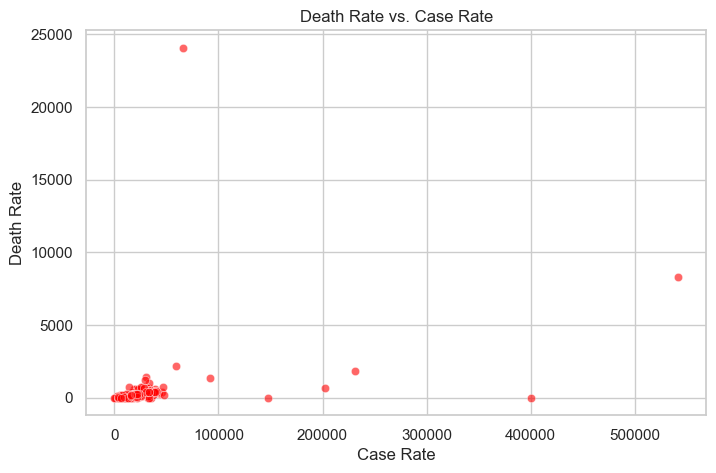

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Case_Rate'], y=df['Death_Rate'], color='red', alpha=0.6)
plt.title("Death Rate vs. Case Rate")
plt.xlabel("Case Rate")
plt.ylabel("Death Rate")
plt.show()


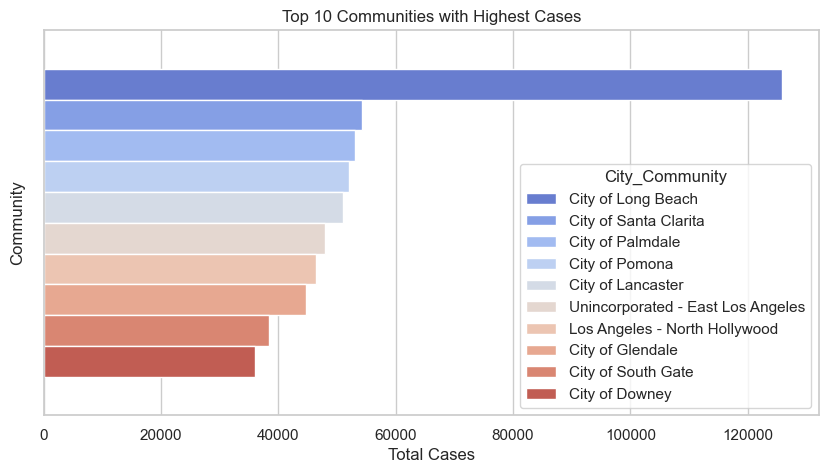

In [17]:
top_10_cases = df.nlargest(10, 'Cases')

plt.figure(figsize=(10,5))
sns.barplot(hue=top_10_cases['City_Community'], x=top_10_cases['Cases'], palette='coolwarm')
plt.title("Top 10 Communities with Highest Cases")
plt.xlabel("Total Cases")
plt.ylabel("Community")
plt.show()


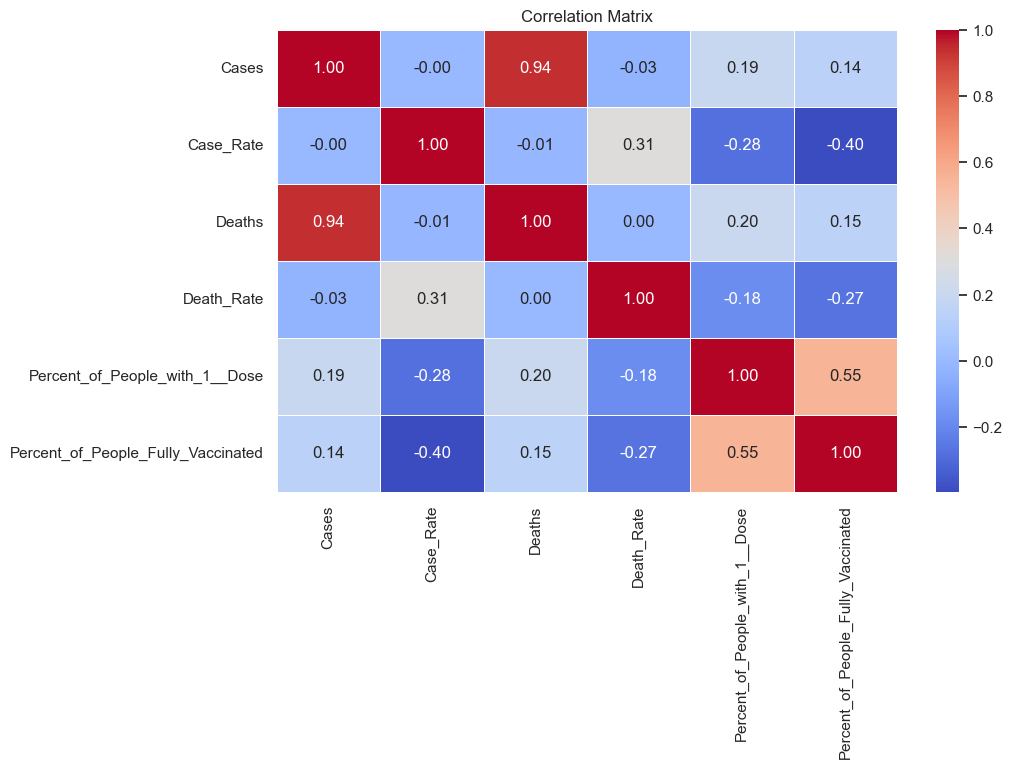

In [18]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display heatmap of correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


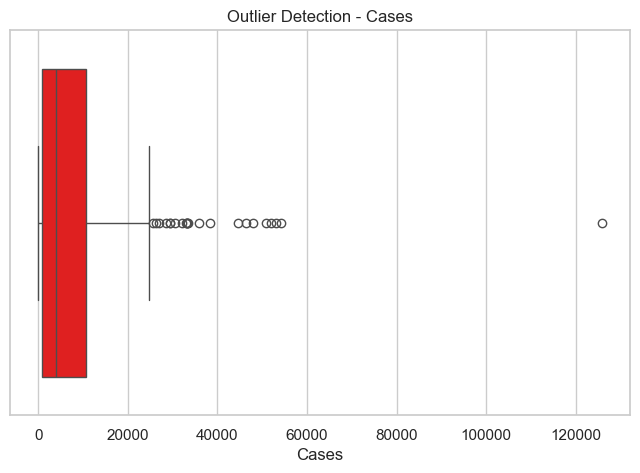

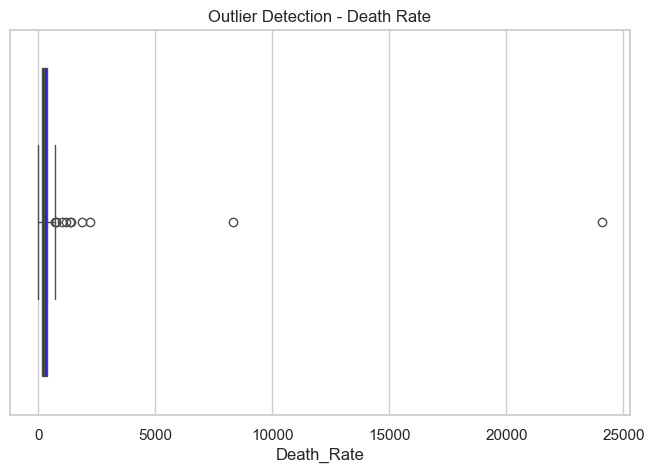

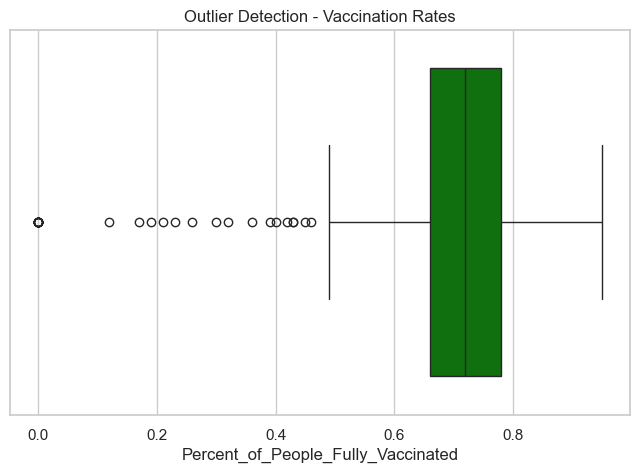

In [19]:
# Boxplot for Cases
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Cases"], color="red")
plt.title("Outlier Detection - Cases")
plt.show()

# Boxplot for Death Rate
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Death_Rate"], color="blue")
plt.title("Outlier Detection - Death Rate")
plt.show()

# Boxplot for Vaccination Rates
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Percent_of_People_Fully_Vaccinated"], color="green")
plt.title("Outlier Detection - Vaccination Rates")
plt.show()


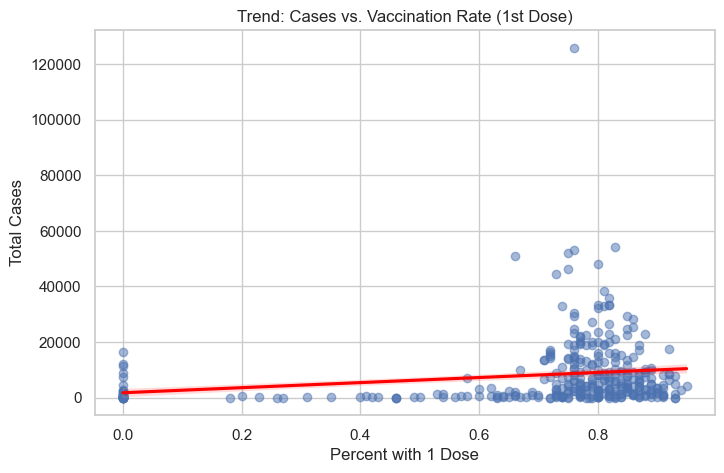

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.regplot(x=df['Percent_of_People_with_1__Dose'], y=df['Cases'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Trend: Cases vs. Vaccination Rate (1st Dose)")
plt.xlabel("Percent with 1 Dose")
plt.ylabel("Total Cases")
plt.show()


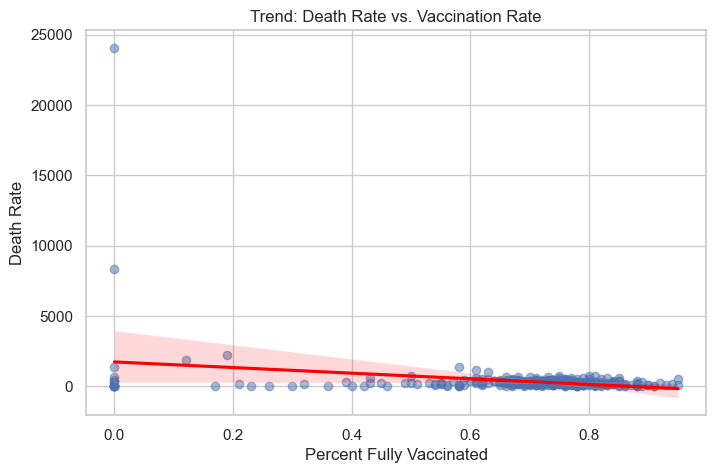

In [21]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Percent_of_People_Fully_Vaccinated'], y=df['Death_Rate'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Trend: Death Rate vs. Vaccination Rate")
plt.xlabel("Percent Fully Vaccinated")
plt.ylabel("Death Rate")
plt.show()


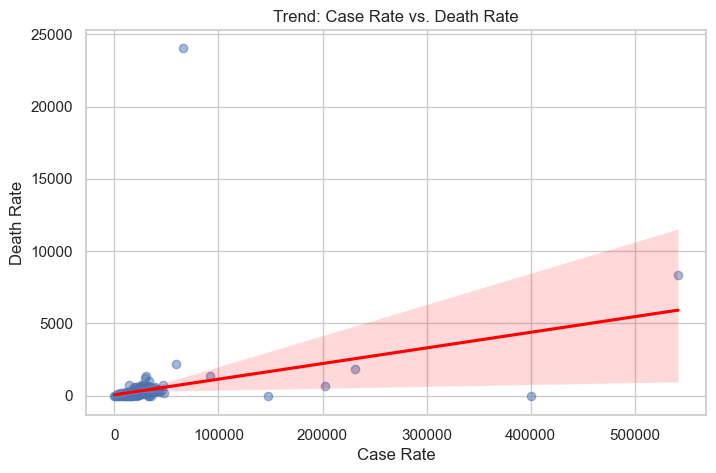

In [22]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Case_Rate'], y=df['Death_Rate'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Trend: Case Rate vs. Death Rate")
plt.xlabel("Case Rate")
plt.ylabel("Death Rate")
plt.show()


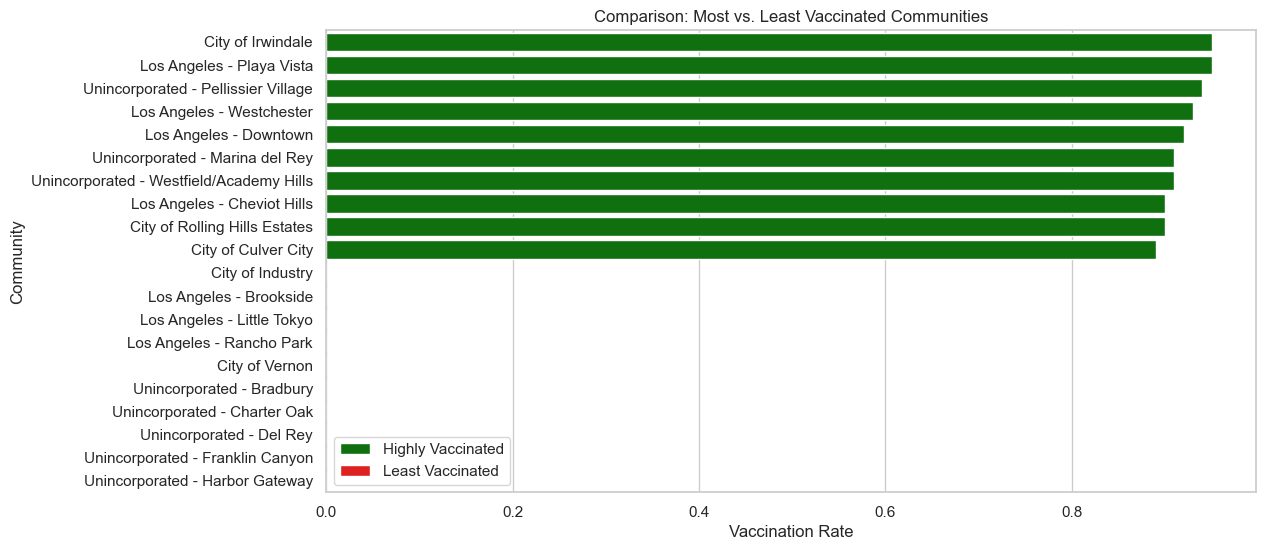

In [23]:
# Top 10 most vaccinated communities
top_vaccinated = df.nlargest(10, 'Percent_of_People_Fully_Vaccinated')

# Bottom 10 least vaccinated communities
low_vaccinated = df.nsmallest(10, 'Percent_of_People_Fully_Vaccinated')

# Plot comparison
plt.figure(figsize=(12,6))
sns.barplot(y=top_vaccinated['City_Community'], x=top_vaccinated['Percent_of_People_Fully_Vaccinated'], color='green', label="Highly Vaccinated")
sns.barplot(y=low_vaccinated['City_Community'], x=low_vaccinated['Percent_of_People_Fully_Vaccinated'], color='red', label="Least Vaccinated")
plt.legend()
plt.xlabel("Vaccination Rate")
plt.ylabel("Community")
plt.title("Comparison: Most vs. Least Vaccinated Communities")
plt.show()


C:\Users\LDIN\AppData\Local\Temp\ipykernel_17652\3255732352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cases['City_Community'], x=top_cases['Cases'], palette='coolwarm')


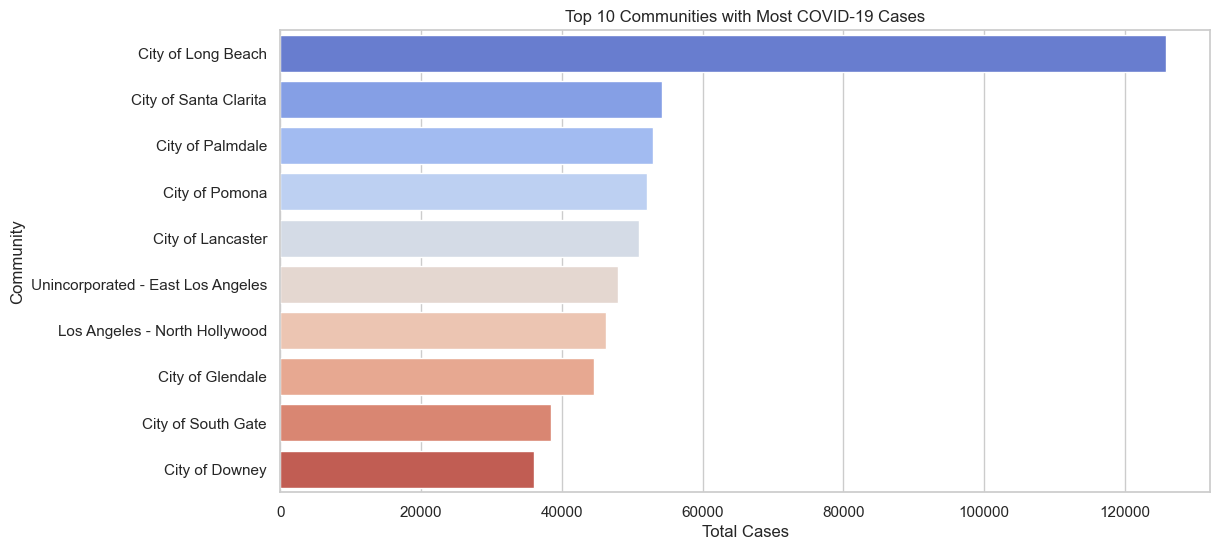

In [24]:
top_cases = df.nlargest(10, 'Cases')

plt.figure(figsize=(12,6))
sns.barplot(y=top_cases['City_Community'], x=top_cases['Cases'], palette='coolwarm')
plt.xlabel("Total Cases")
plt.ylabel("Community")
plt.title("Top 10 Communities with Most COVID-19 Cases")
plt.show()


C:\Users\LDIN\AppData\Local\Temp\ipykernel_12960\3841838171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_death_rate['City_Community'], x=top_death_rate['Death_Rate'], palette='Reds')


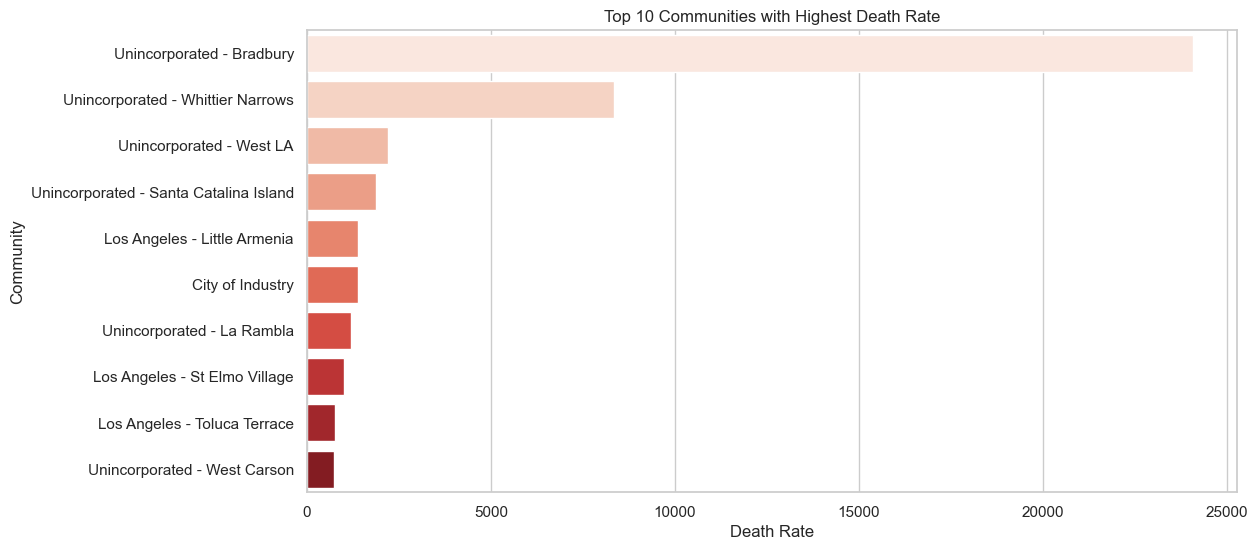

In [119]:
top_death_rate = df.nlargest(10, 'Death_Rate')

plt.figure(figsize=(12,6))
sns.barplot(y=top_death_rate['City_Community'], x=top_death_rate['Death_Rate'], palette='Reds')
plt.xlabel("Death Rate")
plt.ylabel("Community")
plt.title("Top 10 Communities with Highest Death Rate")
plt.show()


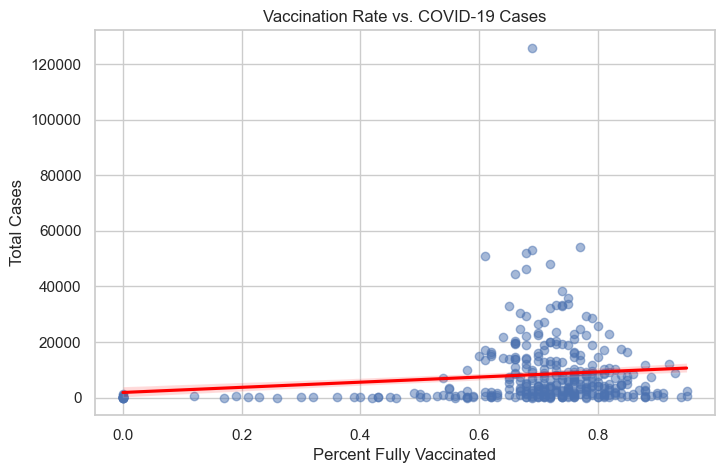

In [120]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Percent_of_People_Fully_Vaccinated'], y=df['Cases'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Vaccination Rate vs. COVID-19 Cases")
plt.xlabel("Percent Fully Vaccinated")
plt.ylabel("Total Cases")
plt.show()


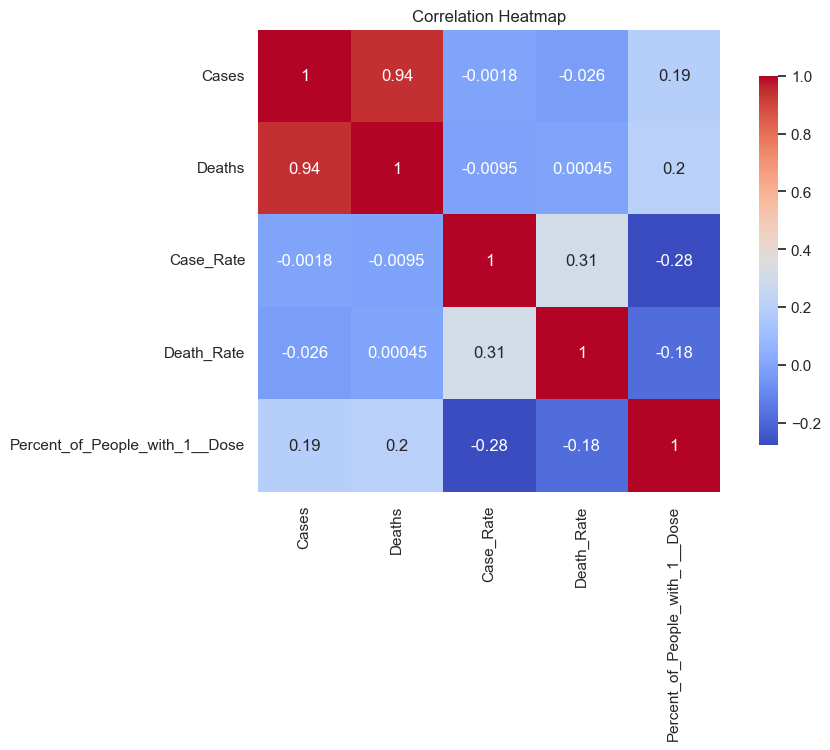

In [121]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Calculate the correlation matrix  
correlation_matrix = df[['Cases', 'Deaths', 'Case_Rate', 'Death_Rate', 'Percent_of_People_with_1__Dose']].corr()  

# Create a heatmap  
plt.figure(figsize=(10, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})  
plt.title('Correlation Heatmap')  
plt.show()  

C:\Users\LDIN\AppData\Local\Temp\ipykernel_12960\2186579630.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vaccination_data = df.groupby('Vaccination_Category').agg({'Cases': 'sum', 'Deaths': 'sum'}).reset_index()


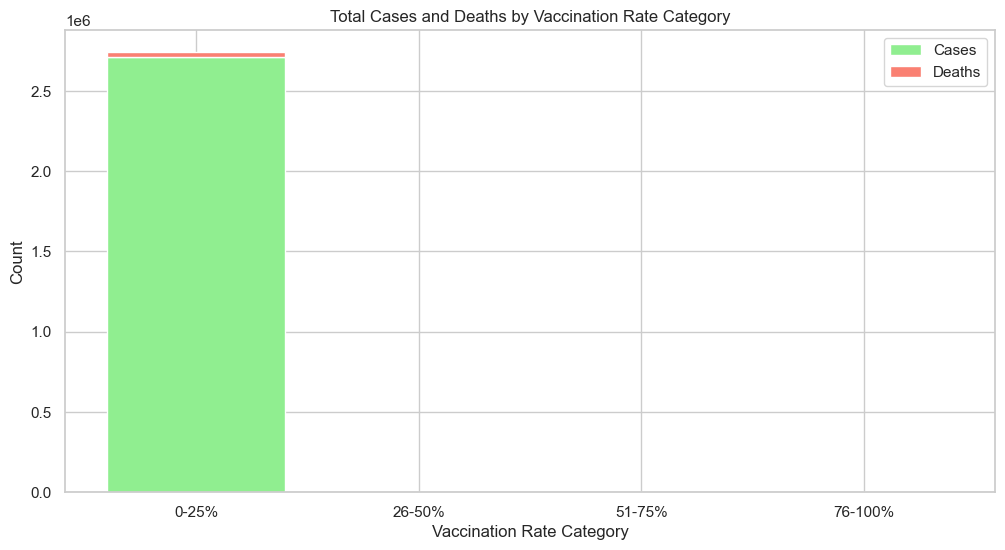

In [129]:
# Assuming 'Vaccination_Category' already exists in your DataFrame  
vaccination_data = df.groupby('Vaccination_Category').agg({'Cases': 'sum', 'Deaths': 'sum'}).reset_index()  

# Create the stacked bar chart  
plt.figure(figsize=(12, 6))  
plt.bar(vaccination_data['Vaccination_Category'], vaccination_data['Cases'], color='lightgreen', label='Cases')  
plt.bar(vaccination_data['Vaccination_Category'], vaccination_data['Deaths'], bottom=vaccination_data['Cases'], color='salmon', label='Deaths')  
plt.title('Total Cases and Deaths by Vaccination Rate Category')  
plt.xlabel('Vaccination Rate Category')  
plt.ylabel('Count')  
plt.legend()  
plt.show()  

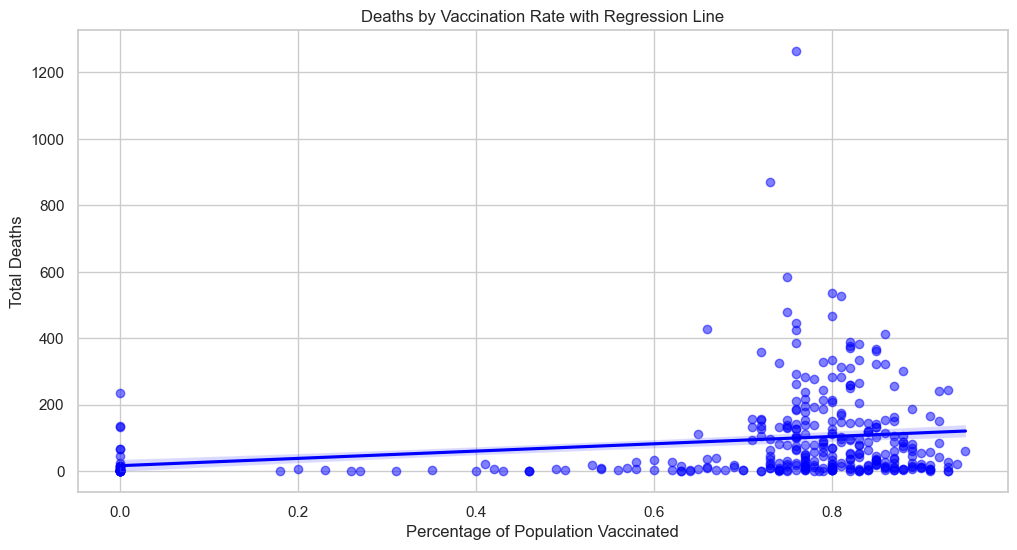

In [131]:
plt.figure(figsize=(12, 6))  
sns.regplot(x='Percent_of_People_with_1__Dose', y='Deaths', data=df, color='blue', scatter_kws={'alpha': 0.5})  
plt.title('Deaths by Vaccination Rate with Regression Line')  
plt.xlabel('Percentage of Population Vaccinated')  
plt.ylabel('Total Deaths')  
plt.show()  